#k-최근접 이웃 회귀
지도 학습 알고리즘은 크게 **분류와 회귀(regression)**으로 나뉜다. 분류는 앞서 2장에서 수행해보았다.

**분류**는 샘플을 몇 개의 클래스 중 하나로 분류하는 문제다. 

**회귀**는 클래스 중 하나로 분류한느 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다.





In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

csv = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fish.csv', \
                  names = ["Species", "Weight", "Length1", "Length2", "Length3", "Height", "Width"])

Mounted at /content/gdrive


In [2]:
import numpy as np

perch_length = list(csv["Length2"])
perch_length = np.array(list(map(float, perch_length[73:129])))

perch_weight = list(csv["Weight"])
perch_weight = np.array(list(map(float, perch_weight[73:129])))
print(perch_length)
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


### k-최근접 이웃 분류 알고리즘은 간단하다
먼저 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 

그런 다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측하는 원리다.

우선 데이터의 형태부터 산점도로 확인해보자.

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

데이터의 형태는 기본적으로 농어의 길이가 커짐에 따라 무게도 늘어나는 경향을 보이고 있다.

본격적으로 데이터를 훈련을 위한 훈련 세트와 테스트 세트로 나누어보자.

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42,) (14,) (42,) (14,)


**사이킷런에 사용할 훈련세트는 2차원 배열이어야 한다는 점을 기억하는가?** 

perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다. 

넘파이의 reshape()함수를 이용해서 (n,) 형태의 1차원 배열을 (n,1)꼴의 2차원 배열로 만들어 줄 것이다.

+ 넘파이에는 배열의 크기를 자동으로 지정하는 기능도 존재하는데, 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.(유용하니 기억하자)

In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


#결정계수(R^2)
사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 **KNeighborsRegressor**이다.

fit() 메서드로 회귀 모델을 훈련해보자.

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.9928094061010639


1에 굉장히 가까운 값으로 나오는 것을 확인할 수 있다. 그런데 이 점수는 무엇일까?

분류에서의 점수는 **정확도**라고 불리는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 

하지만 회귀에서 분류와 같은 정확도로 판단하기에는 무리가 있다. **회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.**

### 회귀의 경우에는 조금 다른 값으로 평가하는데 이 점수를 결정계수(coefficient of determination)라고 부른다. 

계산 방식은 "1 - (타깃-예측)^2의 합/(타깃-평균)^5의 합"으로 계산된다. 

+ 타깃의 평균정도를 예측하는 수준이라면 분자와 분모가 비슷해져서 결정계수가 0에 가까워진다.

+ 예측이 타깃에 아주 가까워지면 분자가 0에 가까워지기 때문에 결정계수는 1에 가까운 값이 된다.


0.99면 아주 좋은 값인 것 같다. 하지만 정확도처럼 결정계수가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 

다른 값을 계산해보자. 타깃과 예측한 값 사이의 차이를 구해보면 어느 정도 예측이 벗어났는지 가늠하기 좋다. 

In [11]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mea = mean_absolute_error(test_target, test_prediction)
print(mea)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 

# 과대적합 vs 과소적합
앞에서 훈련한 모델을 사용해 테스트 세트가 아닌 훈련 세트의 결정계수 점수를 확인해보자.

In [10]:
print(knr.score(train_input, train_target))

0.9698823289099255


**일반적으로 모델을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어진다.**  보통 그렇다. 그런데 우리 모델의 결과는 그렇지 않다. 이러한 상황을 어떻게 해석할 수 있을까?

+ 만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 **과대적합(overfitting)**되었다고 말한다. 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 떄 잘 동작하지 않을 것이다. 
+ 반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 모델이 훈련 세트에 **과소적합(underfitting)**되었다고 말한다. 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다. 또한 다른 원인은 훈련 세트와 테스트 세트의 크기가 매우 작은 경우에도 발생한다.

본 상황에서는 과소적합이 발생한 것을 확인할 수 있다. 이러한 문제는 어떻게 해결할 수 있을까?

### **과소적합의 경우는 모델을 조금 더 복잡하게 만들어서 훈련 세트에 더 잘 맞게 만드는 것으로 해결할 수 있다.** 

**k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것**이다. 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다. 

In [16]:
knr.n_neighbors = 3 #사이킷런의 k-최근접 이웃 알고리즘의 기본값은 5이다. 

#모델 재훈련
knr.fit(train_input, train_target)
print("훈련 데이터:", knr.score(train_input, train_target))
print("테스트 데이터:", knr.score(test_input, test_target))


훈련 데이터: 0.9804899950518966
테스트 데이터: 0.974645996398761


k값을 줄였더니 훈련 세트의 결정계수 점수가 높게 나왔다. 또한 예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 것 같다.

이제 이 모델이 테스트 세트와 추가될 농어 데이터에도 일반화를 잘하리라 예상할 수 있다.

# **확인문제**
과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들어보자.

앞서 만든 k-최근접 이웃 회귀 모델의 k 값을 1,5,10으로 바꿔가며 훈련해보자. n이 커짐에 따라 모델이 단순해지는 것을 볼 수 있는가?

(40,)


(40,)


(40,)


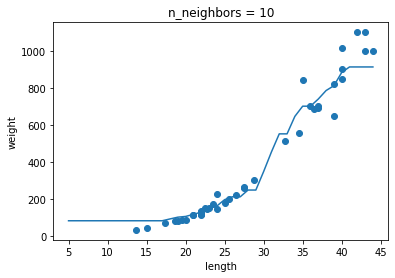

In [24]:
knr = KNeighborsRegressor()

#5에서 45까지의 x 좌표를 만든다.
x = np.arange(5,45).reshape(-1,1)

#n = 1, 5, 10일 때 예측 결과를 그래프로 그려보자
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  #지정한 x 범위에 대한 예측을 구한다
  prediction = knr.predict(x)
  print(prediction.shape)

  #훈련 세트와 예측 결과를 그래프로 그린다.
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title("n_neighbors = {}".format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()